In [19]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 6) # making plots slightly larger by default

# Loading and processing the data

In [5]:
column_names = [
    "CRIM",    # per capita crime rate by town
    "ZN",      # proportion of residential land zoned for lots over 25,000 sq.ft.
    "INDUS",   # proportion of non-retail business acres per town
    "CHAS",    # Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    "NOX",     # nitric oxides concentration (parts per 10 million)
    "RM",      # average number of rooms per dwelling
    "AGE",     # proportion of owner-occupied units built prior to 1940
    "DIS",     # weighted distances to five Boston employment centres
    "RAD",     # index of accessibility to radial highways
    "TAX",     # full-value property-tax rate per $10,000
    "PTRATIO", # pupil-teacher ratio by town
    "B",       # 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    "LSTAT",   # % lower status of the population
    "MEDV"     # Median value of owner-occupied homes in $1000's
] # from docs

lines = []
with open('data/boston.txt', 'r') as f:
    all_lines = f.read().strip().split('\n')

data_lines = all_lines[22:] # lines after description
merged_lines = []

# some issue with file: every line presented as 2 split lines. welp, we can join them and proceed
for i in range(0, len(data_lines), 2):
    line = data_lines[i].strip() + " " + data_lines[i+1].strip()
    merged_lines.append(line)

# io.stringio is simulating a file-input, sep=r'\s+' - multiple whitespaces
data = pd.read_csv(io.StringIO('\n'.join(merged_lines)), 
                   sep=r'\s+', 
                   header=None, 
                   names=column_names)

print(data.head()) # first 5 rows of the data to ensure that we loaded it

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


# Dataset shape, info and description

In [6]:
print(data.shape) 

(506, 14)


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
data.isnull().sum() # no NaNs and nulls so no need to fill them

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
# Getting statistics for 3 selected columns (mean, median and standard deviation)

In [11]:
print("Mean of MEDV:", data['MEDV'].mean())
print("Median of MEDV:", data['MEDV'].median())
print("Std of MEDV:", data['MEDV'].std())

print("Mean of CRIM:", data['CRIM'].mean())
print("Median of CRIM:", data['CRIM'].median())
print("Std of CRIM:", data['CRIM'].std())

print("Mean of RM:", data['RM'].mean())
print("Median of RM:", data['RM'].median())
print("Std of RM:", data['RM'].std())

Mean of MEDV: 22.532806324110677
Median of MEDV: 21.2
Std of MEDV: 9.197104087379818
Mean of CRIM: 3.613523557312254
Median of CRIM: 0.25651
Std of CRIM: 8.60154510533249
Mean of RM: 6.284634387351779
Median of RM: 6.2085
Std of RM: 0.7026171434153233


# Plotting the distribution of median value of homes (MEDV)
## It shows how often each value of MEDV occurs in the dataset
### As we can see, most houses have a MEDV of around 20-25 (in $1000)

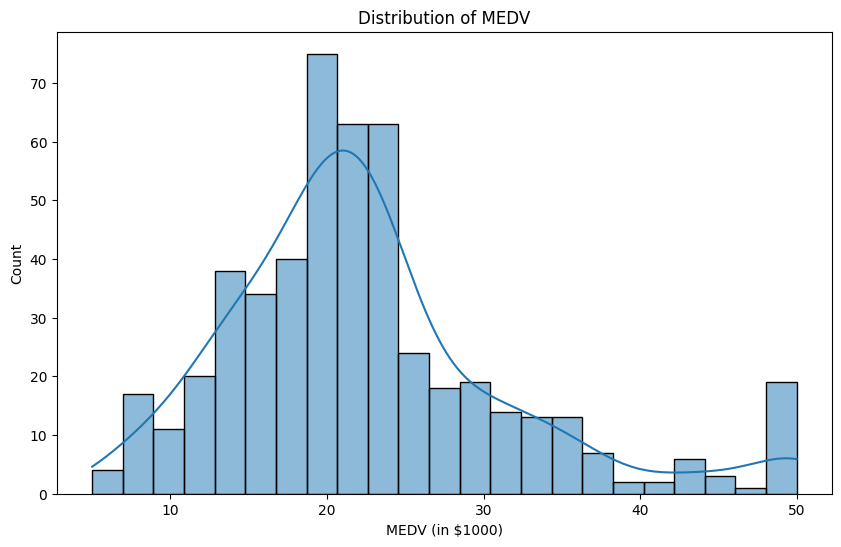

In [13]:
plt.figure()
sns.histplot(data['MEDV'], kde=True)
plt.title('Distribution of MEDV')
plt.xlabel('MEDV (in $1000)')
plt.ylabel('Count')
plt.show()


# Scatter plot between rooms (RM) and median value of homes (MEDV)
## It shows how the number of rooms in a house affects its value
### As we can see, there is a positive correlation between the number of rooms and the value of the house

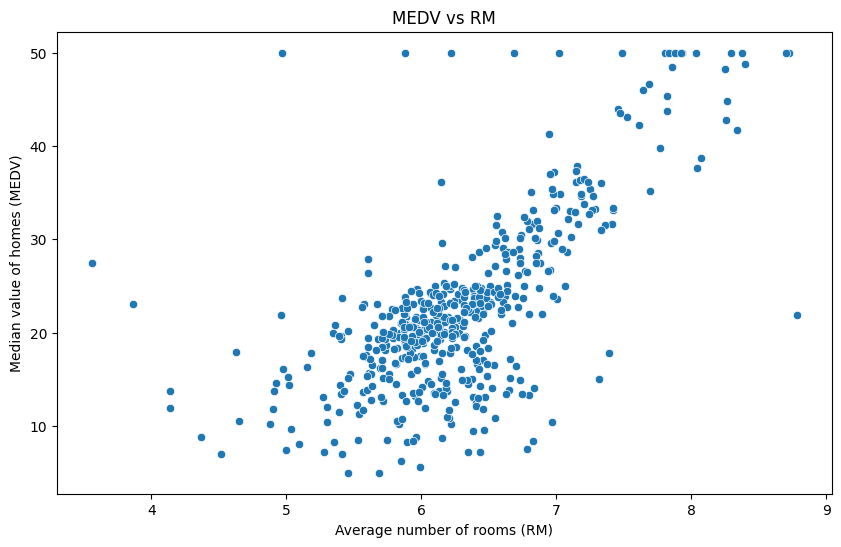

In [14]:
plt.figure()
sns.scatterplot(x='RM', y='MEDV', data=data)
plt.title('MEDV vs RM')
plt.xlabel('Average number of rooms (RM)')
plt.ylabel('Median value of homes (MEDV)')
plt.show()


# Boxplot for the per capita crime rate (CRIM)
## It shows the distribution of CRIM values and identifies potential outliers
### As we can see, there are some outliers with very high CRIM values

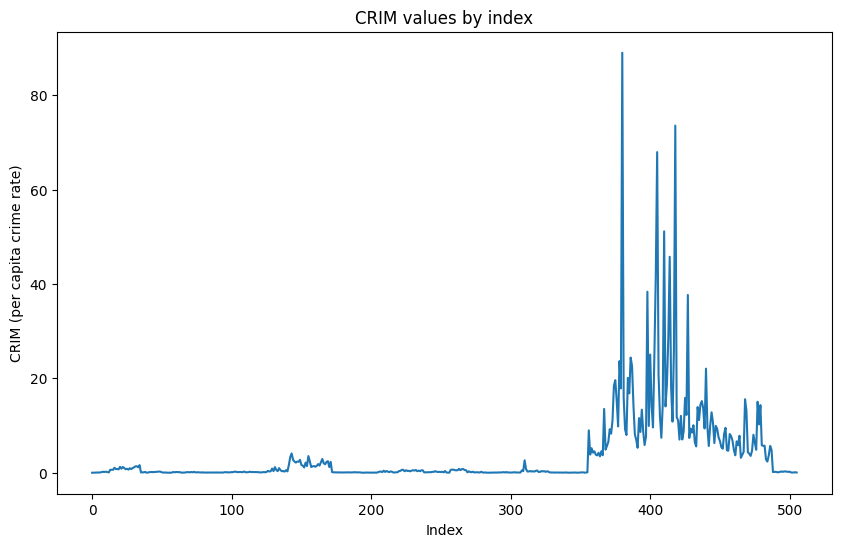

In [15]:
plt.figure()
plt.plot(data.index, data['CRIM'])
plt.title('CRIM values by index')
plt.xlabel('Index')
plt.ylabel('CRIM (per capita crime rate)')
plt.show()

# Boxplot for the comparison of median value of homes (MEDV) based on proximity to the Charles River (CHAS)
## As we can see, homes near the river (CHAS=1) tend to have higher median values compared to those not near the river (CHAS=0)

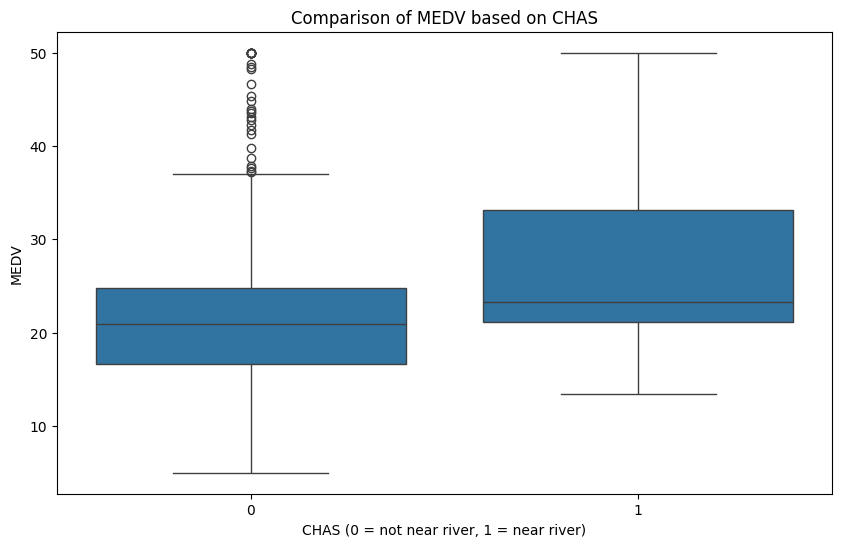

In [16]:
plt.figure()
sns.boxplot(x='CHAS', y='MEDV', data=data)
plt.title('Comparison of MEDV based on CHAS')
plt.xlabel('CHAS (0 = not near river, 1 = near river)')
plt.ylabel('MEDV')
plt.show()


In [17]:
chas_0_medv = data.loc[data['CHAS'] == 0, 'MEDV']
chas_1_medv = data.loc[data['CHAS'] == 1, 'MEDV']
print("Statistics for MEDV where CHAS=0:")
print(chas_0_medv.describe())
print("\nStatistics for MEDV where CHAS=1:")
print(chas_1_medv.describe())

Statistics for MEDV where CHAS=0:
count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: MEDV, dtype: float64

Statistics for MEDV where CHAS=1:
count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: MEDV, dtype: float64


# Correlation matrix heatmap
## It shows the correlation between different features in the dataset
### As we can see, some features have a strong positive or negative correlation with each other

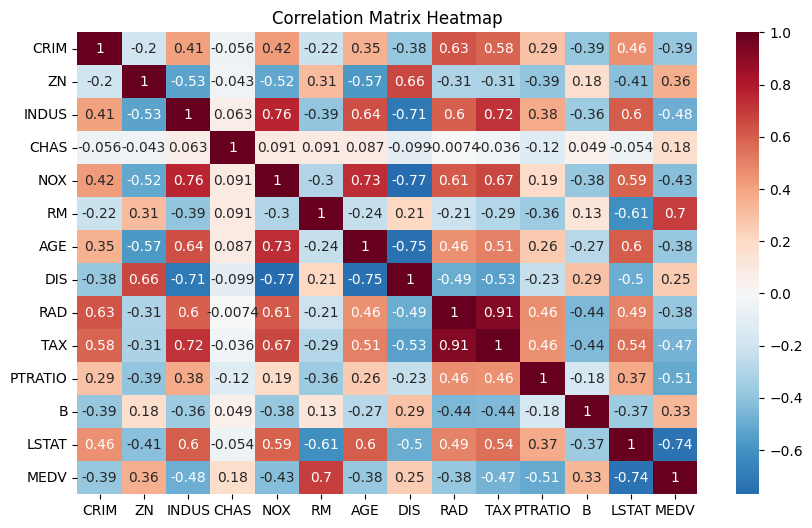

In [18]:
corr_matrix = data.corr()
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Hypothesis:
Homes located near the river (CHAS=1) with a higher than average number of rooms (RM > mean(RM)) and a lower than average LSTAT (lower status of population) (LSTAT < mean(LSTAT)) have a significantly higher median home value (MEDV) compared to the rest of the homes.


In [23]:
mean_RM = data['RM'].mean()
mean_LSTAT = data['LSTAT'].mean()

filtered_data = data[(data['CHAS'] == 1) & (data['RM'] > mean_RM) & (data['LSTAT'] < mean_LSTAT)]

other_data = data[~((data['CHAS'] == 1) & (data['RM'] > mean_RM) & (data['LSTAT'] < mean_LSTAT))]

print(filtered_data['MEDV'].describe())

count    16.000000
mean     36.443750
std      10.957674
min      21.900000
25%      27.300000
50%      33.150000
75%      50.000000
max      50.000000
Name: MEDV, dtype: float64


In [24]:
print(other_data['MEDV'].describe())

count    490.000000
mean      22.078571
std        8.782524
min        5.000000
25%       16.700000
50%       20.900000
75%       24.700000
max       50.000000
Name: MEDV, dtype: float64


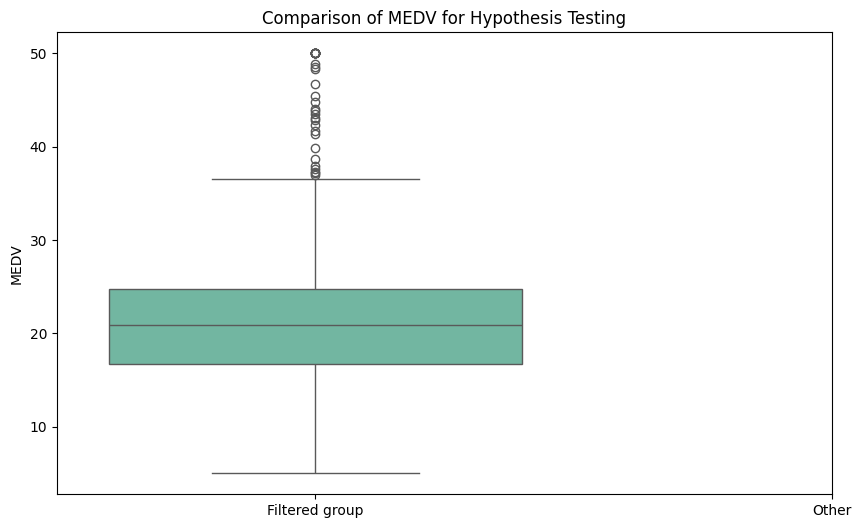

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=[filtered_data['MEDV'], other_data['MEDV']], 
            palette="Set2")
plt.xticks([0, 1], ['Filtered group', 'Other'])
plt.title('Comparison of MEDV for Hypothesis Testing')
plt.ylabel('MEDV')
plt.show()

# Conclusion:
The filtered group (CHAS=1, RM > average, LSTAT < average) shows a mean MEDV of approximately 36.44 and a median of 33.15, both of which are substantially higher than the mean (22.08) and median (20.9) MEDV of all other homes. This indicates that the selected conditions (proximity to the river, high number of rooms, and low percentage of lower status population) are indeed associated with notably higher home values. Thus, the hypothesis is supported by the data.

In [29]:
data['MEDV_per_RM'] = data['MEDV'] / data['RM']
data['CRIM_distance_ratio'] = data['CRIM'] / (data['DIS'] + 0.1)

print(data[['CRIM', 'LSTAT', 'DIS', 'MEDV_per_RM', 'CRIM_distance_ratio']].head(10))

      CRIM  LSTAT     DIS  MEDV_per_RM  CRIM_distance_ratio
0  0.00632   4.98  4.0900     3.650190             0.001508
1  0.02731   9.14  4.9671     3.363962             0.005390
2  0.02729   4.03  4.9671     4.829506             0.005386
3  0.03237   2.94  6.0622     4.772792             0.005253
4  0.06905   5.33  6.0622     5.065062             0.011205
5  0.02985   5.21  6.0622     4.463453             0.004844
6  0.08829  12.43  5.5605     3.809049             0.015598
7  0.14455  19.15  5.9505     4.390797             0.023891
8  0.21124  29.93  6.0821     2.930208             0.034170
9  0.17004  17.10  6.5921     3.147901             0.025409
